In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (113).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (31).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (133).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (56).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (277).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (189).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (263).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (117).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (141).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (57).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (66).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (61).jpg
/kaggle/input/planetas-sistema-solar/validation/jupiter/jupiter (198).jpg
/kaggle/input/planetas-sistema-solar/valida

# Setup

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
!pip install --upgrade tensorflow-decision-forests tensorflow-text tf-keras
!pip install tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Succes

In [4]:
import tensorflow as tf
tf.__version__

2024-12-01 08:56:02.942854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-01 08:56:02.964730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-01 08:56:02.971213: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.17.0'

In [5]:
tf.config.optimizer.set_experimental_options({"layout_optimizer": False})

In [6]:
!lscpu

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   4
  On-line CPU(s) list:    0-3
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:           6
    Model:                85
    Thread(s) per core:   2
    Core(s) per socket:   2
    Socket(s):            1
    Stepping:             3
    BogoMIPS:             4000.48
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht sysc
                          all nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xt
                          opology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq
                           ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt
                           aes xsave avx f16c rdrand hypervisor 

In [7]:
!nvidia-smi

Sun Dec  1 08:56:10 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

# Extraccion y Preparacion de datos

In [9]:
dir_train = "/kaggle/input/planetas-sistema-solar/training"

In [10]:
dir_test = "/kaggle/input/planetas-sistema-solar/test"

In [11]:
dir_val = "/kaggle/input/planetas-sistema-solar/validation"

In [12]:
class_data = ['earth','jupiter','mars','mercury','neptune','pluto','saturn','uranus','venus']

In [13]:
data_train = pathlib.Path(dir_train)
data_test = pathlib.Path(dir_test)
data_val = pathlib.Path(dir_val)

## Datos de Training

In [14]:
image_train = len(list(data_train.glob('*/*.jpg')))
print(image_train)

1834


In [15]:
print(len(list(data_train.glob(f'*{class_data[0]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[1]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[2]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[3]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[4]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[5]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[6]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[7]}/*.jpg'))))
print(len(list(data_train.glob(f'*{class_data[8]}/*.jpg'))))

209
202
215
201
202
201
201
202
201


## Datos de Test

In [16]:
image_test = len(list(data_test.glob('*/*.jpg')))
print(image_test)

255


In [17]:
print(len(list(data_test.glob(f'*{class_data[0]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[1]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[2]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[3]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[4]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[5]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[6]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[7]}/*.jpg'))))
print(len(list(data_test.glob(f'*{class_data[8]}/*.jpg'))))

29
28
30
28
28
28
28
28
28


## Datos de Validacion

In [18]:
image_val = len(list(data_val.glob('*/*.jpg')))
print(image_val)

519


In [19]:
print(len(list(data_val.glob(f'*{class_data[0]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[1]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[2]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[3]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[4]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[5]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[6]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[7]}/*.jpg'))))
print(len(list(data_val.glob(f'*{class_data[8]}/*.jpg'))))

59
57
61
57
57
57
57
57
57


## Visualizacion de cada planeta

In [20]:
earth = list(data_train.glob(f'{class_data[0]}/*'))
jupiter = list(data_train.glob(f'{class_data[1]}/*'))
mars = list(data_train.glob(f'{class_data[2]}/*'))
mercury = list(data_train.glob(f'{class_data[3]}/*'))
neptune = list(data_train.glob(f'{class_data[4]}/*'))
pluto = list(data_train.glob(f'{class_data[5]}/*'))
saturn = list(data_train.glob(f'{class_data[6]}/*'))
uranus = list(data_train.glob(f'{class_data[7]}/*'))
venus = list(data_train.glob(f'{class_data[8]}/*'))

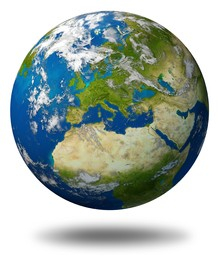

In [21]:
PIL.Image.open(str(earth[0]))

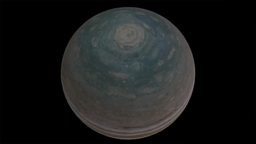

In [22]:
PIL.Image.open(str(jupiter[0]))

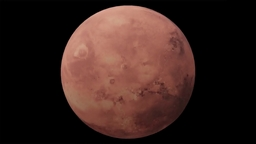

In [23]:
PIL.Image.open(str(mars[0]))

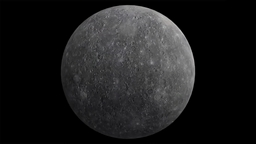

In [24]:
PIL.Image.open(str(mercury[0]))

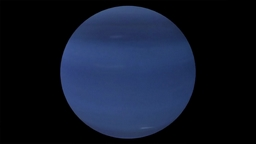

In [25]:
PIL.Image.open(str(neptune[0]))

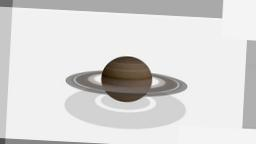

In [26]:
PIL.Image.open(str(saturn[0]))

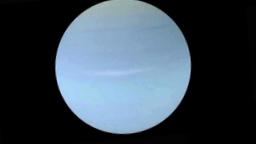

In [27]:
PIL.Image.open(str(uranus[0]))

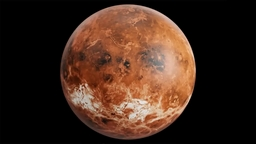

In [28]:
PIL.Image.open(str(venus[0]))

## Ajuste de imagenes

In [29]:
epochs = 20
batch_size = int(image_train/epochs)
#img_height = 224
#img_width = 224
img_height = 180
img_width = 180

In [30]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1834 files belonging to 9 classes.
Using 1468 files for training.


I0000 00:00:1733043373.474740      23 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733043373.641485      23 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733043373.641793      23 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733043373.644299      23 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [31]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_test,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 255 files belonging to 9 classes.


In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_val,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 519 files belonging to 9 classes.
Using 103 files for validation.


In [33]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['earth', 'jupiter', 'mars', 'mercury', 'neptune', 'pluto', 'saturn', 'uranus', 'venus']


## Visualizacion con ajuste

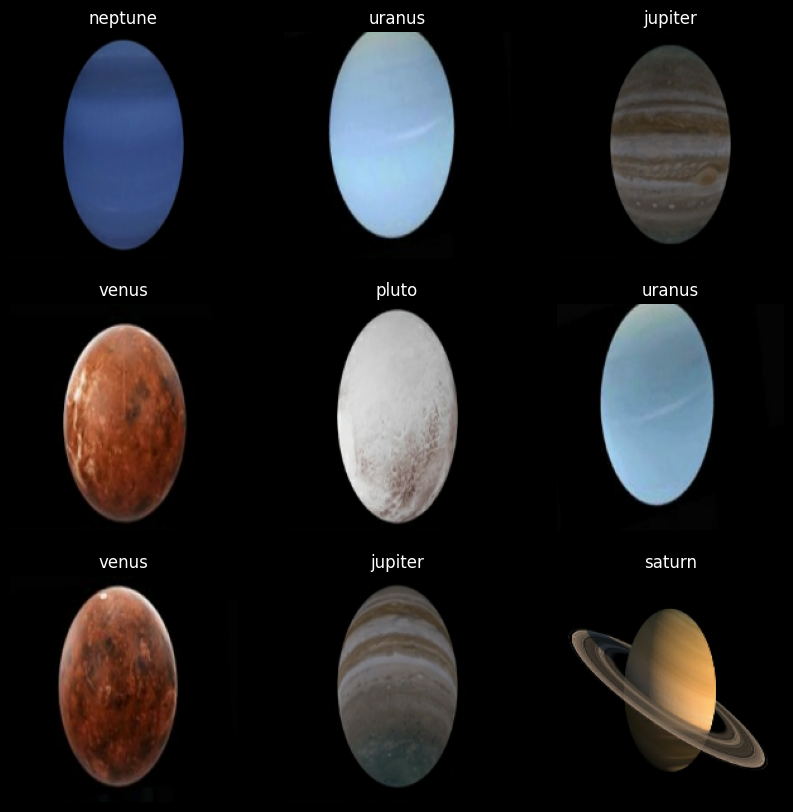

In [34]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [35]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(91, 180, 180, 3)
(91,)


## Configuracion y normalizacion de datos

In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.take(1).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
normalization_layer = layers.Rescaling(1./255)

In [38]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9081711


In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

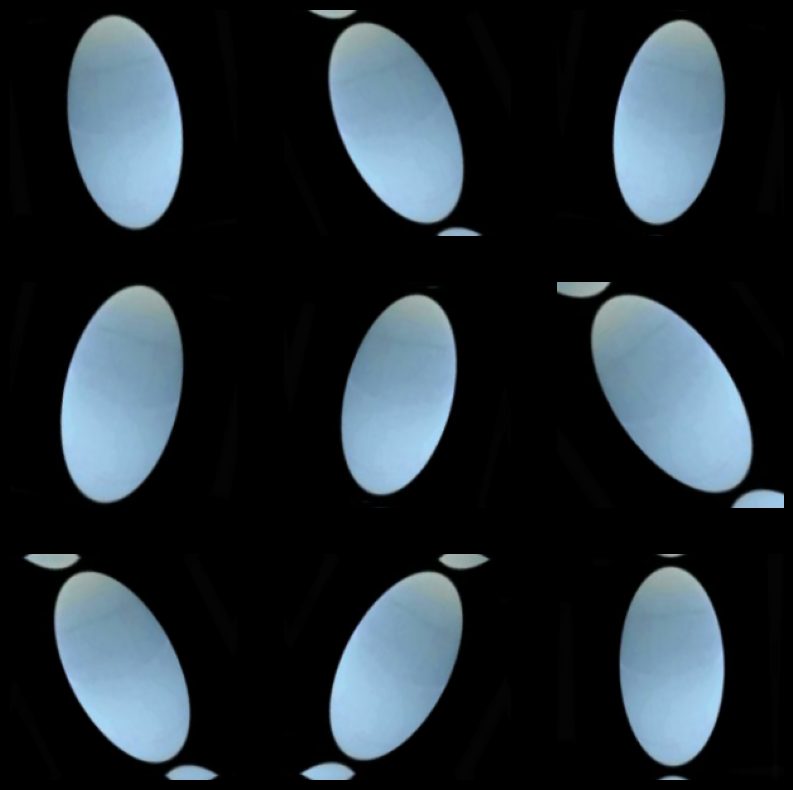

In [40]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[20].numpy().astype("uint8"))
        plt.axis("off")

# Modelo

In [41]:
model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del modelo

In [44]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20


W0000 00:00:1733043386.400747      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.440726      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.443034      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.464872      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.468272      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.483672      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.487162      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.492485      92 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043386.507328      92 gp

 3/17 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1099 - loss: 2.2664

W0000 00:00:1733043387.544375      95 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043387.558571      95 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043387.570563      95 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043387.576372      95 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043387.585387      95 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced


11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1847 - loss: 2.1429

W0000 00:00:1733043388.022492      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.023275      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.023967      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.024766      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.025562      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.026355      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.027164      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.027937      93 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043388.028769      93 gp

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.2435 - loss: 2.0059 - val_accuracy: 0.6505 - val_loss: 1.0079
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7259 - loss: 0.7950 - val_accuracy: 0.8350 - val_loss: 0.6272
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8130 - loss: 0.5869 - val_accuracy: 0.7767 - val_loss: 0.5775
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8464 - loss: 0.4920 - val_accuracy: 0.8058 - val_loss: 0.4973
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8587 - loss: 0.4572 - val_accuracy: 0.8447 - val_loss: 0.4094
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8723 - loss: 0.3939 - val_accuracy: 0.8447 - val_loss: 0.3756
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8943 - loss: 0.3271 - val_accuracy: 0.8544 - val_loss: 0.3989
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9137 - loss: 0.2704 - val_accuracy: 0.9029 - val_loss: 0.

# Presicion y perdida del modelo

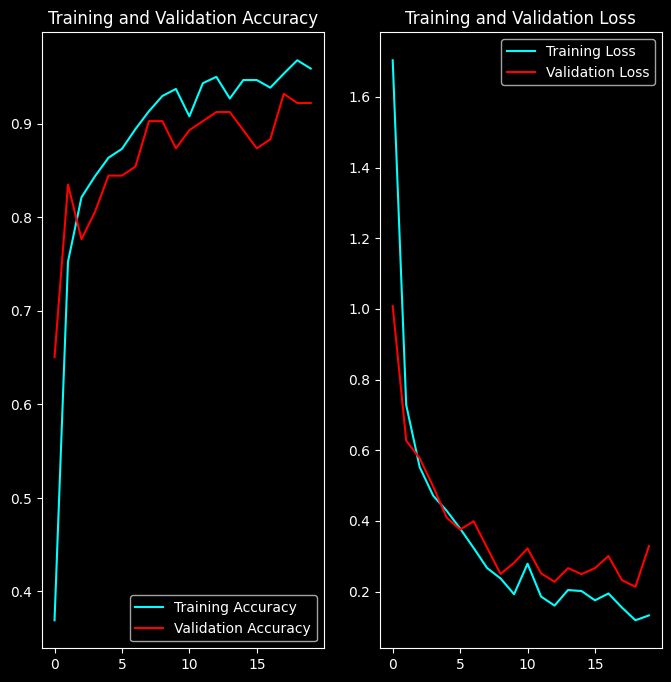

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy',color="aqua")
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color="red")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',color="aqua")
plt.plot(epochs_range, val_loss, label='Validation Loss', color="red")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [48]:
len(predictions)

91

In [49]:
predictions[0]

array([1.3641141e-05, 1.3327195e-10, 1.9664845e-19, 8.6304961e-17,
       9.9865711e-01, 4.3964417e-23, 3.1800193e-20, 1.3291498e-03,
       2.6820494e-18], dtype=float32)

In [50]:
np.argmax(predictions[0])

4

# Resultados

In [51]:
image_test_batch, label_test_batch = next(iter(test_ds))

In [52]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label, img
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label,num_classes):
  true_label = true_label
  plt.grid(False)
  plt.xticks(range(num_classes))
  plt.yticks([])
  thisplot = plt.bar(range(num_classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

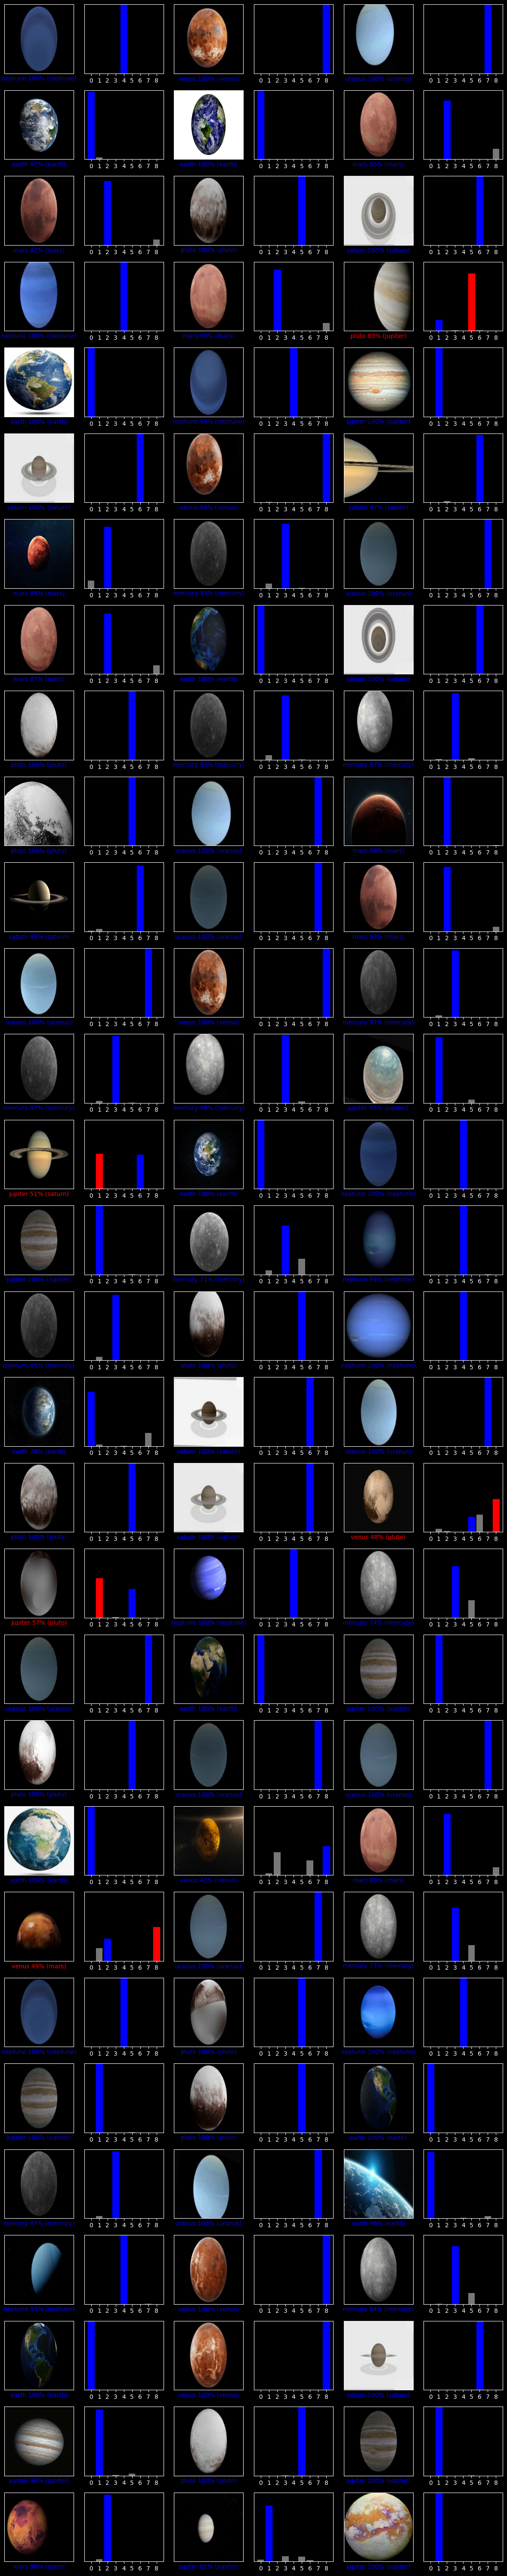

In [53]:
num_rows = 30
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], label_test_batch[i], image_test_batch[i].numpy().astype("uint8"))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], label_test_batch[i], num_classes)
plt.tight_layout()
plt.show()

In [54]:
print(class_names)

['earth', 'jupiter', 'mars', 'mercury', 'neptune', 'pluto', 'saturn', 'uranus', 'venus']


601222/601222 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


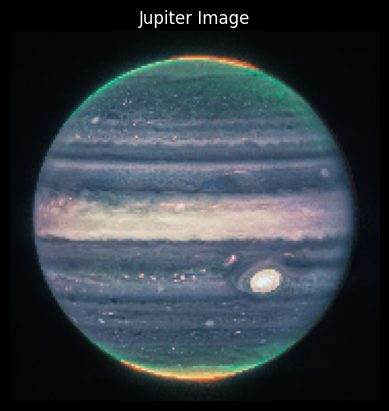

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
This image most likely belongs to jupiter with a 83.01 percent confidence according to the first model.


W0000 00:00:1733043420.444740      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.445405      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.445942      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.446472      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.446992      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.447597      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.448140      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.448683      94 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1733043420.449205      94 gp

In [55]:
img_url = "https://ciencia.nasa.gov/wp-content/uploads/sites/2/2023/06/1_JWST_2022-07-27_Jupiter.png?w=1280&format=webp"
img_path = tf.keras.utils.get_file('jupiter', origin=img_url)

image = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))  # Cambia el tamaño según tus necesidades
image_ar = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen si es necesario
image_ar = image_ar / 255.0  # Normalizar a [0, 1]

plt.imshow(image_ar)
plt.axis('off')  # Opcional: ocultar los ejes
plt.title('Jupiter Image')  # Título opcional
plt.show()

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array = tf.data.Dataset.from_tensor_slices([img_array])
img_array = img_array.cache().prefetch(buffer_size=AUTOTUNE)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the first model."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

30516/30516 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


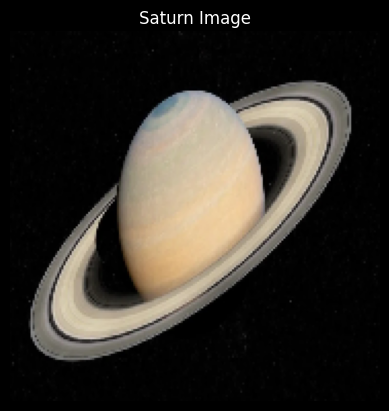

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
This image most likely belongs to saturn with a 96.08 percent confidence according to the first model.


In [56]:
img_url = "https://uscdn.eltribunodejujuy.com/042024/1714260931082.webp?cw=1155&ch=650&extw=jpg"
img_path = tf.keras.utils.get_file('saturn', origin=img_url)

image = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))  # Cambia el tamaño según tus necesidades
image_ar = tf.keras.preprocessing.image.img_to_array(image)

# Normalizar la imagen si es necesario
image_ar = image_ar / 255.0  # Normalizar a [0, 1]

plt.imshow(image_ar)
plt.axis('off')  # Opcional: ocultar los ejes
plt.title('Saturn Image')  # Título opcional
plt.show()

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array = tf.data.Dataset.from_tensor_slices([img_array])
img_array = img_array.cache().prefetch(buffer_size=AUTOTUNE)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence according to the first model."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)